# Explore Citi Bike Data
---

Before you move forward this part, please make sure that you've prepared the data. If not. you can follow the [Create_Database](https://github.com/Fitzmon/CitiBike_Geospatial_Analysis/blob/main/Code/Create_Database.ipynb) tutorial to download the data.  
  
In this notebook, we will take a look at the Citi Bike data.

---
Reference:
- [Exploring NYC Bike Share Data](https://towardsdatascience.com/exploring-bike-share-data-3e3b2f28760c)
- [Citi Bike Analysis, April 2018 - March 2019](https://wbrueske.github.io/Citi-Bike-Analysis/)
- [Taking off the Training Wheels: Re-balancing the Citibike System](https://github.com/mitkrieg/citibike-timeseries)
- [Citi Bike Analysis](https://s3.amazonaws.com/personal-sv/Citibike_Station_Analysis+(6).html)
- [Citi Bike 2017 Analysis](https://towardsdatascience.com/citi-bike-2017-analysis-efd298e6c22c)
- [Analysis and prediction of Citi Bike usage in the unpredictable 2020](https://towardsdatascience.com/analysis-and-prediction-of-citi-bike-usage-in-the-unpredictable-2020-3401da26881b)
- [NYC Citi Bike Trips Change, 2019–2020](https://observablehq.com/@benoldenburg/nyc-citi-bike-trips-change-2019-2020)

---
# Table of Contents

In [1]:
import os
from os import listdir
import datetime

import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import numpy as np

In [2]:
filepath = r"C:\Users\Hui\Desktop\Graduate_Project\CitiBike\data\trips"
file_list = os.listdir(filepath)
print(file_list)

['citi_2021.csv', 'citi_2022.csv', 'nyc_daily.csv', 'nyc_daily21_22.csv', 'nyc_daily22.csv', 'ny_trip_data_2018.csv', 'ny_trip_data_2019.csv', 'ny_trip_data_2020.csv']


In [22]:
df = pd.read_csv("C:\\Users\\Hui\\Desktop\\Graduate_Project\\CitiBike\\data\\trips\\ny_trip_data_2020.csv")
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,789,2020-01-01 00:00:55.3900,2020-01-01 00:14:05.1470,504,1 Ave & E 16 St,40.732219,-73.981656,307,Canal St & Rutgers St,40.714275,-73.989900,30326,Subscriber,1992,1
1,1541,2020-01-01 00:01:08.1020,2020-01-01 00:26:49.1780,3423,West Drive & Prospect Park West,40.661063,-73.979453,3300,Prospect Park West & 8 St,40.665147,-73.976376,17105,Customer,1969,1
2,1464,2020-01-01 00:01:42.1400,2020-01-01 00:26:07.0110,3687,E 33 St & 1 Ave,40.743227,-73.974498,259,South St & Whitehall St,40.701221,-74.012342,40177,Subscriber,1963,1
3,592,2020-01-01 00:01:45.5610,2020-01-01 00:11:38.1550,346,Bank St & Hudson St,40.736529,-74.006180,490,8 Ave & W 33 St,40.751551,-73.993934,27690,Subscriber,1980,1
4,702,2020-01-01 00:01:45.7880,2020-01-01 00:13:28.2400,372,Franklin Ave & Myrtle Ave,40.694546,-73.958014,3637,Fulton St & Waverly Ave,40.683239,-73.965996,32583,Subscriber,1982,1


In [5]:
#df = pd.read_csv('C:\\Users\\Hui\\Desktop\\Graduate_Project\\CitiBike\\data\\trips\\ny_trip_data_2018')
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,320,2019-01-01 00:01:47.4010,2019-01-01 00:07:07.5810,3160.0,Central Park West & W 76 St,40.778968,-73.973747,3283.0,W 89 St & Columbus Ave,40.788221,-73.970416,15839,Subscriber,1971,1
1,316,2019-01-01 00:04:43.7360,2019-01-01 00:10:00.6080,519.0,Pershing Square North,40.751873,-73.977706,518.0,E 39 St & 2 Ave,40.747804,-73.973442,32723,Subscriber,1964,1
2,591,2019-01-01 00:06:03.9970,2019-01-01 00:15:55.4380,3171.0,Amsterdam Ave & W 82 St,40.785247,-73.976673,3154.0,E 77 St & 3 Ave,40.773142,-73.958562,27451,Subscriber,1987,1
3,2719,2019-01-01 00:07:03.5450,2019-01-01 00:52:22.6500,504.0,1 Ave & E 16 St,40.732219,-73.981656,3709.0,W 15 St & 6 Ave,40.738046,-73.996430,21579,Subscriber,1990,1
4,303,2019-01-01 00:07:35.9450,2019-01-01 00:12:39.5020,229.0,Great Jones St,40.727434,-73.993790,503.0,E 20 St & Park Ave,40.738274,-73.987520,35379,Subscriber,1979,1


# Expolore the Data

Check out the dataset.

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20551697 entries, 0 to 20551696
Data columns (total 15 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   tripduration             int64  
 1   starttime                object 
 2   stoptime                 object 
 3   start station id         float64
 4   start station name       object 
 5   start station latitude   float64
 6   start station longitude  float64
 7   end station id           float64
 8   end station name         object 
 9   end station latitude     float64
 10  end station longitude    float64
 11  bikeid                   int64  
 12  usertype                 object 
 13  birth year               int64  
 14  gender                   int64  
dtypes: float64(6), int64(4), object(5)
memory usage: 2.3+ GB


In [7]:
pd.DataFrame.from_records([(col, df[col].nunique(), df[col].dtype, df[col].memory_usage(deep=True) )  for col in df.columns],
                          columns=['Column Name', 'Unique', 'Data Type','Memory Usage'])

,Column Name,Unique,Data Type,Memory Usage
0,tripduration,34047,int64,164413704
1,starttime,20539444,object,1664687585
2,stoptime,20539225,object,1664687585
3,start station id,936,float64,164413704
4,start station name,938,object,1574199724
5,start station latitude,977,float64,164413704
6,start station longitude,975,float64,164413704
7,end station id,973,float64,164413704
8,end station name,976,object,1573922082
9,end station latitude,1014,float64,164413704


In [8]:
df.describe().round(2)

,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender
count,20551697.00,20551517.00,20551697.00,20551697.00,20551517.00,20551697.00,20551697.00,20551697.00,20551697.00,20551697.00
mean,978.25,1663.47,40.74,-73.98,1654.43,40.74,-73.98,29683.88,1980.20,1.16
std,10553.04,1477.34,0.03,0.02,1476.89,0.03,0.02,7557.98,12.13,0.54
min,61.00,72.00,40.66,-74.03,72.00,40.66,-74.08,14529.00,1857.00,0.00
25%,362.00,382.00,40.72,-74.00,380.00,40.72,-74.00,25356.00,1970.00,1.00
50%,615.00,514.00,40.74,-73.99,513.00,40.74,-73.99,30927.00,1983.00,1.00
75%,1079.00,3295.00,40.76,-73.97,3295.00,40.76,-73.97,35055.00,1990.00,1.00
max,3812666.00,3911.00,40.87,-73.88,3911.00,40.87,-73.88,42088.00,2003.00,2.00


In [9]:
df.isnull().sum()

tripduration                 0
starttime                    0
stoptime                     0
start station id           180
start station name         180
start station latitude       0
start station longitude      0
end station id             180
end station name           180
end station latitude         0
end station longitude        0
bikeid                       0
usertype                     0
birth year                   0
gender                       0
dtype: int64

In [10]:
#Drop rows with null values
df.dropna(inplace=True)
print(df.isnull().sum())

tripduration               0
starttime                  0
stoptime                   0
start station id           0
start station name         0
start station latitude     0
start station longitude    0
end station id             0
end station name           0
end station latitude       0
end station longitude      0
bikeid                     0
usertype                   0
birth year                 0
gender                     0
dtype: int64


In [ ]:
# finding the 1st quartile
q1 = np.quantile(df['birth year'], 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(df['birth year'], 0.75)
med = np.median(df['birth year'])
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

Make boxplot data for 3 years

In [ ]:
# Box Plot
fig = plt.figure(figsize =(10, 8))
fig.suptitle('User Birth Year Distribution, 2019', fontsize=14)

ax = fig.add_subplot(111)
bp = ax.boxplot(df['birth year'], showmeans=True)

ax.set_title('Age')
ax.set_xlabel('xlabel')
ax.set_ylabel('ylabel')

# show plot
plt.show()

### Trip Duration

In [ ]:
# finding the 1st quartile
q1 = np.quantile(df['tripduration'], 0.25)
 
# finding the 3rd quartile
q3 = np.quantile(df['tripduration'], 0.75)
med = np.median(df['tripduration'])
 
# finding the iqr region
iqr = q3-q1
 
# finding upper and lower whiskers
upper_bound = q3+(1.5*iqr)
lower_bound = q1-(1.5*iqr)
print(iqr, upper_bound, lower_bound)

In [ ]:
# Box Plot
fig = plt.figure(figsize =(10, 8))
#fig.suptitle('Trip Duration Distribution, 2019', fontsize=14)

ax = fig.add_subplot(111)
bp = ax.boxplot(df['tripduration'], showmeans=True)

ax.set_title('Trip Duration Distribution, 2019')
ax.set_xlabel('xlabel')
ax.set_ylabel('Trip Duration')

# show plot
plt.show()

## Scrub Data

Here we removed false starts that were less than 300s while the start station id is same as end station id. This could happen when riders have a pre-ride check. 

I removed trips that were less than 90 seconds, as these are likely to be false starts, or riders who are making sure the bike is secure after their actual ride ends. Also, rides over two hours are suspect, as it seems unlikely that riders would spend the extra $4.00 per minute, rather than renting a bike from another service for less money.

I removed riders who said they were over 80 years old. Not to say that seniors don't ride bikes, but I find it more likely that these users of the service are lying about their age.

Lastly, I removed from the dataframe items with null values. I didn't find any, but this was more for the integrity of the notebook.

All the cleaning brought the trip count down from 1977177 to 1967317, a loss of about 0.5%

In [ ]:
falsestart = df.loc[(df['start station id'] == df['end station id']) & (df['tripduration'] <= 300)]
falsestart.describe().round(2)

In [ ]:
df.drop(falsestart.index, inplace=True)

df['tripduration'].describe().round(2)

Meanwhile, rides over **45 mins** would charge extra $0.15 per minute ($9/hr). Therefore, rides over an hour are suspectful, as it seems like riders would prefer to end the current trip within 45 mins rather than paying more.

Remove rides that go on for longer than a reasonable trip  
5 hours = 18,000 seconds
3 hours = 10,800 seconds
2 hours = 7,200 seconds  
1 hour = 3,600 seconds

In [ ]:
unreasonable_duration = df [(df['tripduration'] > 7200)].index
df.drop(unreasonable_duration , inplace=True)

df['tripduration'].describe().round(2)

In [ ]:
# Box Plot
fig = plt.figure(figsize =(10, 8))
#fig.suptitle('Trip Duration Distribution, 2019', fontsize=14)


ax = fig.add_subplot(111)
bp = ax.boxplot(df['tripduration']//60, showmeans=True)

ax.set_title('Trip Duration Distribution, 2019')
ax.set_xlabel('xlabel')
ax.set_ylabel('Trip Duration')

# show plot
plt.show()

In [23]:
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

In [24]:
df['date'] = df['starttime'].dt.date.astype('category')
df['month'] = df['starttime'].dt.month.astype('category')
df['start_hour'] = df['starttime'].dt.hour.astype('category')
df['start_day'] = df['starttime'].dt.day.astype('category')
df['weekday'] = df['starttime'].dt.strftime('%A').astype('category')

In [25]:
# User Type
df["subscriber"] = df["usertype"] == "Subscriber"
df["subscriber"] = df["subscriber"].astype(int)

df["customer"] = df["usertype"] == "Customer"
df["customer"] = df["customer"].astype(int)

# Total Users
df["total_uses"] = df["subscriber"] + df["customer"]
df.head()

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,...,birth year,gender,date,month,start_hour,start_day,weekday,subscriber,customer,total_uses
0,789,2020-01-01 00:00:55.390,2020-01-01 00:14:05.147,504,1 Ave & E 16 St,40.732219,-73.981656,307,Canal St & Rutgers St,40.714275,...,1992,1,2020-01-01,1,0,1,Wednesday,1,0,1
1,1541,2020-01-01 00:01:08.102,2020-01-01 00:26:49.178,3423,West Drive & Prospect Park West,40.661063,-73.979453,3300,Prospect Park West & 8 St,40.665147,...,1969,1,2020-01-01,1,0,1,Wednesday,0,1,1
2,1464,2020-01-01 00:01:42.140,2020-01-01 00:26:07.011,3687,E 33 St & 1 Ave,40.743227,-73.974498,259,South St & Whitehall St,40.701221,...,1963,1,2020-01-01,1,0,1,Wednesday,1,0,1
3,592,2020-01-01 00:01:45.561,2020-01-01 00:11:38.155,346,Bank St & Hudson St,40.736529,-74.006180,490,8 Ave & W 33 St,40.751551,...,1980,1,2020-01-01,1,0,1,Wednesday,1,0,1
4,702,2020-01-01 00:01:45.788,2020-01-01 00:13:28.240,372,Franklin Ave & Myrtle Ave,40.694546,-73.958014,3637,Fulton St & Waverly Ave,40.683239,...,1982,1,2020-01-01,1,0,1,Wednesday,1,0,1


In [14]:
df.shape # How many observations and variables are there
df['bikeid'].unique().shape # Number of individual bikes
df['start station id'].unique().shape # Number of citibike stations

(936,)

### Trip Duration

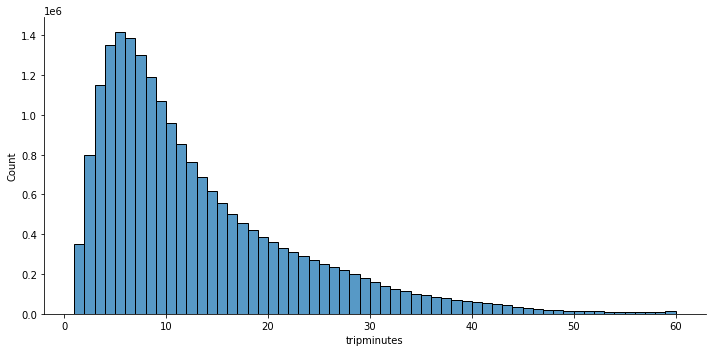

In [16]:
# Seaborn displot
df['tripminutes'] = df['tripduration'] // 60
sns.displot(data=df,x="tripminutes", bins=range(1,61), aspect=10/5);

### Trip Count by Month

In [15]:
# Compute trip counts / month
df.index = df['starttime'] 
trip_2019_monthly = df.starttime.resample('M').agg(count)

# Plot trip counts
trip_2019_monthly.plot(kind = 'area', stacked = False, figsize = (15, 5),
                  color = 'darkorange', linewidth = 2, legend = False)
plt.tick_params(axis = 'both', which = 'major', labelsize = 18)
plt.title('Number of trips / month\n')
plt.xlabel('')
plt.ylabel('Number of trips')

NameError: name 'count' is not defined

In [ ]:
month_df.head()

### Rides by Hour and Day (Peak Hors and Days)

In [26]:
temporal_df = df.groupby(['weekday', 'start_hour']).sum().reset_index()
weekdays = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
temporal_df['weekday'] = pd.Categorical(temporal_df['weekday'], categories = weekdays)
temporal_df = temporal_df.sort_values('weekday')
temporal_df.head()

,weekday,start_hour,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,subscriber,customer,total_uses
47,Monday,23,47223269,69943931,1.351097e+06,-2.453106e+06,72669279,1.351108e+06,-2.453021e+06,1181809604,65767470,34900,23321,9841,33162
27,Monday,3,6178207,8740133,1.656248e+05,-3.006894e+05,8726257,1.656282e+05,-3.006901e+05,145459020,8052463,3908,2639,1426,4065
28,Monday,4,6777047,10561889,1.957553e+05,-3.553576e+05,9904142,1.957486e+05,-3.553661e+05,172405647,9505044,5073,3749,1055,4804
29,Monday,5,16060689,34256908,6.903117e+05,-1.253200e+06,34605496,6.902919e+05,-1.253230e+06,615282573,33534182,19820,15115,1826,16941
30,Monday,6,48347658,114222351,2.321279e+06,-4.214359e+06,114771078,2.321258e+06,-4.214434e+06,2050953239,112812883,69059,52139,4830,56969


In [27]:
temporal_df["total_uses"] = temporal_df["subscriber"] + temporal_df["customer"]
temporal_df.head()

,weekday,start_hour,tripduration,start station id,start station latitude,start station longitude,end station id,end station latitude,end station longitude,bikeid,birth year,gender,subscriber,customer,total_uses
47,Monday,23,47223269,69943931,1.351097e+06,-2.453106e+06,72669279,1.351108e+06,-2.453021e+06,1181809604,65767470,34900,23321,9841,33162
27,Monday,3,6178207,8740133,1.656248e+05,-3.006894e+05,8726257,1.656282e+05,-3.006901e+05,145459020,8052463,3908,2639,1426,4065
28,Monday,4,6777047,10561889,1.957553e+05,-3.553576e+05,9904142,1.957486e+05,-3.553661e+05,172405647,9505044,5073,3749,1055,4804
29,Monday,5,16060689,34256908,6.903117e+05,-1.253200e+06,34605496,6.902919e+05,-1.253230e+06,615282573,33534182,19820,15115,1826,16941
30,Monday,6,48347658,114222351,2.321279e+06,-4.214359e+06,114771078,2.321258e+06,-4.214434e+06,2050953239,112812883,69059,52139,4830,56969


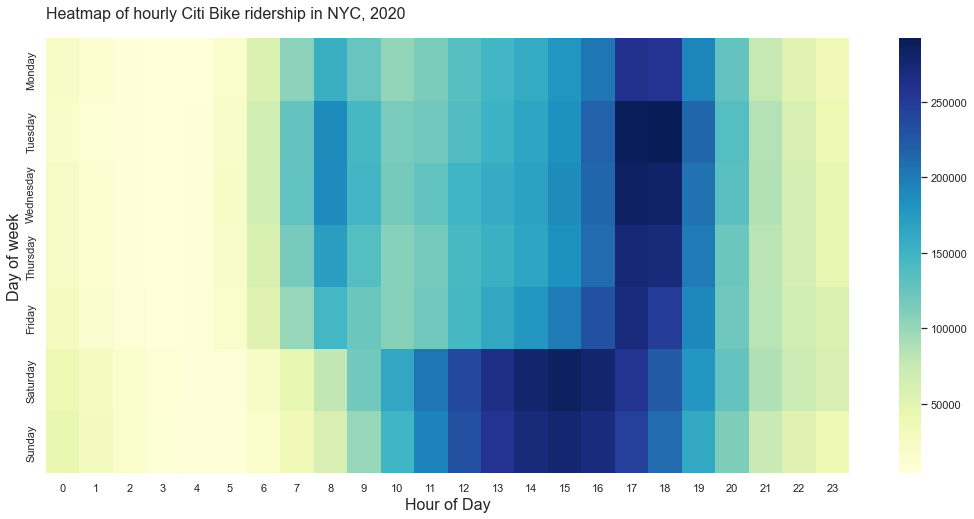

In [29]:
heatmap_pt = pd.pivot_table(temporal_df, values ='total_uses', index=['weekday'], columns='start_hour')
fig, ax = plt.subplots(figsize=(18,8))
sns.set()
sns.heatmap(heatmap_pt, cmap="YlGnBu")

plt.title('Heatmap of hourly Citi Bike ridership in NYC, 2020', loc='left',fontsize=16, pad=20)
plt.xlabel('Hour of Day',fontsize=16)
plt.ylabel('Day of week',fontsize=16)
#plt.savefig('CitiBike2019.png', dpi=400)
plt.show()

In [20]:
# Group to get aggregate data for all start stations for the month
start_station_df = df.groupby(["start station id", "start station name", "start station latitude",
                               "start station longitude"]).sum()

#start_station_df = start_station_df[["subscriber", "customer"]]

# Reset the index for clealiness
#start_station_df.reset_index(inplace=True)
# Total uses column
#start_station_df["total_uses"] = start_station_df["subscriber"] + start_station_df["customer"]
# stationtype 1 is for the start stations. Used for filtering in Tableau
#start_station_df["stationtype"] = 1

start_station_df.head()

,,,,tripduration,end station id,end station latitude,end station longitude,bikeid,birth year,gender,subscriber,customer,total_uses,tripminutes
start station id,start station name,start station latitude,start station longitude,,,,,,,,,,,
72.0,W 52 St & 11 Ave,40.767272,-73.993929,50715739,56941158.0,1.861884e+06,-3.380533e+06,1361200412,90438094,52276,37713,7975,45688,822838
79.0,Franklin St & W Broadway,40.719116,-74.006667,25069282,30886234.0,1.106657e+06,-2.010883e+06,814382810,53761111,31297,23688,3486,27174,404440
82.0,St James Pl & Pearl St,40.711174,-74.000165,11855190,10528877.0,5.680290e+05,-1.032326e+06,415157470,27615999,17910,12397,1554,13951,190776
83.0,Atlantic Ave & Fort Greene Pl,40.683826,-73.976323,19575979,40834792.0,7.113049e+05,-1.293289e+06,525395852,34629279,20027,14669,2814,17483,317694
116.0,W 17 St & 8 Ave,40.741776,-74.001497,37236305,50236626.0,1.984432e+06,-3.603969e+06,1478368499,96521247,57296,43905,4801,48706,596724


In [21]:
df['starttime'] = pd.to_datetime(df['starttime'])
df['stoptime'] = pd.to_datetime(df['stoptime'])

In [ ]:
df.info()

In [ ]:
df.describe().round(2)

In [ ]:
pd.DataFrame.from_records([(col, df[col].nunique(), df[col].dtype, df[col].memory_usage(deep=True) )  for col in df.columns],
                          columns=['Column Name', 'Unique', 'Data Type','Memory Usage'])

In [ ]:
cols = ['start station name', 'end station name', 'bikeid', 'usertype', 'gender']
for col in cols:
    df[col] = df[col].astype('category')

In [ ]:
pd.DataFrame.from_records([(col, df[col].nunique(), df[col].dtype, df[col].memory_usage(deep=True) )  for col in df.columns],
                          columns=['Column Name', 'Unique', 'Data Type','Memory Usage'])

In [ ]:
# Get current work directory
cwd = os.getcwd()
data_loc = cwd + '/data/nyc_trip_data/'

files = []
for file in listdir(data_loc):
    file_loc = data_loc + file
    files.append(file_loc)

In [ ]:
files[6]

In [ ]:
#for file in files:
#    df = pd.read_csv(files)
#    df.head()

df = pd.read_csv(files[6])
df.head()

In [ ]:
# Gender
df["unknown"] = df["gender"] == 0
df["unknown"] = df["unknown"].astype(int)

df["male"] = df["gender"] == 1
df["male"] = df["male"].astype(int)

df["female"] = df["gender"] == 1
df["female"] = df["female"].astype(int)

# User Type
df["subscriber"] = df["usertype"] == "Subscriber"
df["subscriber"] = df["subscriber"].astype(int)

df["customer"] = df["usertype"] == "Customer"
df["customer"] = df["customer"].astype(int)

df.head()

In [ ]:
# Group to get aggregate data for all start stations for the month
start_station_df = df.groupby(["start station id", "start station name", "start station latitude","start station longitude"]).sum()

start_station_df = start_station_df[["male","female", "unknown", "subscriber", "customer"]]

# Reset the index for clealiness
start_station_df.reset_index(inplace=True)
# Total uses column
start_station_df["total_uses"] = start_station_df["subscriber"] + start_station_df["customer"]
# stationtype 1 is for the start stations. Used for filtering in Tableau
start_station_df["stationtype"] = 1

start_station_df.head()

In [ ]:
# Group to get aggregate data for all end stations for the month
end_station_df = df.groupby(["end station id", "end station name", "end station latitude","end station longitude"]).sum()

end_station_df = end_station_df[["male","female", "unknown", "subscriber", "customer"]]

# Reset the index for clealiness
end_station_df.reset_index(inplace=True)
# Total uses column
end_station_df["total_uses"] = end_station_df["subscriber"] + end_station_df["customer"]
# stationtype 0 is for the end stations. Used for filtering in Tableau
end_station_df["stationtype"] = 0

end_station_df.head()

### Combine the DataFrames

In [ ]:
yearly_df = start_station_df
yearly_df = yearly_df.append(end_station_df)
# Need to set up the date month/day/year

In [ ]:
#yearly_df.to_csv(os.path.join(data_loc,"2019-citibike-aggreated.csv"))

### Age

In [ ]:
age_df = df.groupby(["birth year"]).sum()
age_df = age_df[["tripduration", "unknown", "male", "female", "subscriber", "customer"]]
age_df = age_df.rename(columns={"tripduration": "tripduration_sum"})
age_df["total_uses"] = age_df["subscriber"] + age_df["customer"]
age_df.reset_index(inplace=True)
age_df.head()

In [ ]:
#age_df.to_csv(os.path.join(data_loc,"2019-citibike-age.csv"))